In [1]:
# importing important libraries for web scraping

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# reading the url

httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata = httpObject.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6e7580.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/app

In [26]:
soup1 = soup(webdata)

In [28]:
pages_link = soup1.findAll('a',{'class':'ge-49M'})
domain = 'https://www.flipkart.com/q/best-laptops-under-rs-50000?page='

for i in range(2,36):
    link = domain+str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata += webdata1

In [3]:
soupdata = soup(webdata, 'html.parser')
type(soupdata)

KeyboardInterrupt: 

In [30]:
containers = soupdata.findAll('div',{'class':'_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 834


In [31]:
containers[0]    # data of first container

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-dy3501tu-thin-light-laptop/p/itm450f55a8c2cb2?pid=COMG9WRFMYH8AZH2&amp;lid=LSTCOMG9WRFMYH8AZH2U0J2S6&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;srno=b_1_1&amp;otracker=browse&amp;fm=organic&amp;iid=399b2ed4-79a4-4eac-88ea-44d78af156fe.COMG9WRFMYH8AZH2.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=2u5uj739vk0000001643449902106" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-dy3501TU Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kw2fki80/computer/s/p/c/-original-imag8tthgrhpfxgh.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH1S" readonly="" type="checkbox"/><div class="_24_Dny"></div></l

In [34]:
containers[834]

IndexError: list index out of range

In [35]:
f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    # Finding product name
    product = container.find('div',{'class':'_4rR01T'})
    ProductName = product.text.split('-')[0].strip()
    
    # finding stars
    star = container.find('div',{'class':'_3LWZlK'})
    try:
        Stars = star.text
    except:
        Stars = 0
        
    # finding ratings & Reviews    
    Rating = container.find('span',{'class':'_2_R_DZ'})
    try:
        ratRev = re.findall('\d+,?\d*',Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
        
    # finding current price    
    CurrentPrice = container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
    
    # finding MRP
    mrp = container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
        
    # finding information about the product    
    info = container.findAll('li',{'class':'rgWa7D'})
    Processor = info[0].text
    RAM = info[1].text
    Storage = info[3].text
    
    Image = container.img
    ImageURL = Image.get('src')
    
    print(ProductName, Stars, Ratings, Reviews,CurrentPrice,MRP,Processor, RAM, Storage, ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()

HP Core i3 11th Gen 4.5 65 9 43990 49590 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kw2fki80/computer/s/p/c/-original-imag8tthgrhpfxgh.jpeg?q=70


Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 4.8 9 0 49900 68990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/keaaavk0/computer/x/m/y/lenovo-na-laptop-original-imafuzt8r5jqppfn.jpeg?q=70


ASUS VivoBook K15 OLED (2021) Core i3 11th Gen 4.6 20 2 49990 62990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kmmcrrk0/computer/f/o/5/na-thin-and-light-laptop-asus-original-imagfhkhqrxfhetg.jpeg?q=70


HP Pavilion Core i7 11th Gen 0 0 0 98180 118776 Intel Core i7 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/krjjde80/computer/b/q/h/na-gaming-laptop-hp-original-imag5bg5uwgmhmqj.jpeg?q=70


DELL Inspiron Core i3 11th Gen 4.4 23 6 46490 59

ASUS VivoBook 15 (2021) Core i5 11th Gen 4.3 653 70 53490 70990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/kp2y2kw0/computer/y/0/c/na-thin-and-light-laptop-asus-original-imag3ebnzawky4kn.jpeg?q=70


ASUS VivoBook Ultra 14 Core i5 11th Gen 4.5 756 77 54990 73990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/ku4ezrk0/computer/f/n/g/na-thin-and-light-laptop-asus-original-imag7bh6qmjxyqyt.jpeg?q=70


HP Pavilion Core i7 11th Gen 0 0 0 98180 118776 Intel Core i7 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/krjjde80/computer/b/q/h/na-gaming-laptop-hp-original-imag5bg5uwgmhmqj.jpeg?q=70


RedmiBook Pro Core i5 11th Gen 4.2 1406 208 50490 59990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kuwzssw0/computer/x/l/a/redmibook-15-pro-thin-and-light-laptop-redmi-orig

MSI Alpha 15 Ryzen 7 Octa Core 5800H 4.7 71 18 109990 145990 AMD Ryzen 7 Octa Core Processor 16 GB DDR4 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/ktszgy80/computer/h/0/f/alpha-15-b5eek-029in-gaming-laptop-msi-original-imag72h7uptk3x9t.jpeg?q=70


HP Spectre x360 13 Series Core i5 11th Gen 0 0 0 95999 114749 Intel Core i5 Processor (11th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/k8ro3gw0/computer/z/p/q/hp-na-original-imafqpnf5tthbuvh.jpeg?q=70


APPLE MacBook Pro with Touch Bar Core i5 10th Gen 4.7 30 3 179990 194900 Intel Core i5 Processor (10th Gen) 16 GB LPDDR4X RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/kamtsi80/computer/z/p/y/apple-na-thin-and-light-laptop-original-imafs5nhtfzsvwy6.jpeg?q=70


ASUS ROG Zephyrus G14 Ryzen 7 Octa Core Ryzen 7 5 1 1 84990 126990 AMD Ryzen 7 Octa Core Processor (4th Gen) 8 GB DDR4 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/kvba7bk0/computer/x/u/s/ga401ihr-k2067ts-gaming-l



Lenovo Core i5 11th Gen 0 0 0 65990 89990 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kv8fbm80/computer/p/t/6/ideapad-slim-5i-thin-and-light-laptop-lenovo-original-imag86n3qmesbkpj.jpeg?q=70


ASUS ROG Zephyrus S15 Core i7 10th Gen 0 0 0 234990 324990 Intel Core i7 Processor (10th Gen) 32 GB DDR4 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/kfmv9u80/computer/r/g/w/asus-na-gaming-laptop-original-imafwfxbhqtgy8f5.jpeg?q=70


HP Core i5 11th Gen 0 0 0 65990 81684 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kb89ea80/computer/n/m/5/hp-na-thin-and-light-laptop-original-imafsmmghwzzu3mq.jpeg?q=70


DELL Inspiron Core i5 11th Gen 4.5 44 5 74990 78990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kqb8pzk0/computer/d/j/c/na-2-in-1-laptop-dell-original-imag4dy68bwtg8j9.jpeg?q=70


ASUS Vivobook Gaming C

Lenovo Legion Core i7 7th Gen 4.4 209 58 77890 110890 Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features) Full HD LED Backlit Anti-glare IPS Slim Display NVIDIA GeForce GTX 1050 for Desktop Level Performance https://rukminim1.flixcart.com/image/312/312/j2qgscw0/computer/u/k/b/lenovo-notebook-original-imaeuyykhvfchm83.jpeg?q=70


DELL Core i5 11th Gen 0 0 0 73900 88400 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kxm5qq80/computer/l/r/3/na-laptop-dell-original-imagayug47q2rykt.jpeg?q=70


Lenovo IDEAPAD 3 SLIM Ryzen 5 Hexa Core AMD Ryzen™ 5 5500U 0 0 0 59900 62200 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kq6yefk0/computer/b/8/3/ideapad-3-slim-series-laptop-lenovo-original-imag49gb4gcbmpws.jpeg?q=70


DELL Inspiron 13 5000 Core i7 8th Gen 4.2 123 19 76999 89990 Preloaded Microsoft Office Home and Stud

AttributeError: 'NoneType' object has no attribute 'text'

In [38]:
df = pd.read_csv('laptops_info.csv', error_bad_lines = False)
df

b'Skipping line 246: expected 10 fields, saw 14\nSkipping line 250: expected 10 fields, saw 11\nSkipping line 462: expected 10 fields, saw 12\nSkipping line 466: expected 10 fields, saw 14\nSkipping line 468: expected 10 fields, saw 11\nSkipping line 471: expected 10 fields, saw 14\nSkipping line 516: expected 10 fields, saw 11\nSkipping line 523: expected 10 fields, saw 12\nSkipping line 546: expected 10 fields, saw 12\nSkipping line 575: expected 10 fields, saw 12\nSkipping line 580: expected 10 fields, saw 12\nSkipping line 594: expected 10 fields, saw 12\nSkipping line 617: expected 10 fields, saw 11\nSkipping line 683: expected 10 fields, saw 12\nSkipping line 684: expected 10 fields, saw 13\nSkipping line 695: expected 10 fields, saw 14\nSkipping line 697: expected 10 fields, saw 12\nSkipping line 708: expected 10 fields, saw 13\nSkipping line 735: expected 10 fields, saw 12\nSkipping line 738: expected 10 fields, saw 12\n'


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
1,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.8,9,0,49900,68990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook K15 OLED (2021) Core i3 11th Gen,4.6,20,2,49990,62990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
3,HP Pavilion Core i7 11th Gen,0.0,0,0,98180,118776,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,DELL Inspiron Core i3 11th Gen,4.4,23,6,46490,59712,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...
713,ASUS Core i7 11th Gen,0.0,0,0,81990,98990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
714,Lenovo Yoga Slim 7 Core i5 11th Gen,4.6,16,2,89999,92000,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
715,DELL Core i5 11th Gen,0.0,0,0,73900,88400,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
716,Lenovo IDEAPAD 3 SLIM Ryzen 5 Hexa Core AMD Ry...,0.0,0,0,59900,62200,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [39]:
df.shape

(718, 10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   718 non-null    object 
 1   Stars         718 non-null    float64
 2   Ratings       718 non-null    int64  
 3   Reviews       718 non-null    int64  
 4   CurrentPrice  718 non-null    int64  
 5   MRP           718 non-null    int64  
 6   Processor     718 non-null    object 
 7   RAM           718 non-null    object 
 8   Storage       718 non-null    object 
 9   ImageURL      718 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 56.2+ KB


# Find the product having highest ratings ?

In [41]:
df[df['Ratings']==max(df['Ratings'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
371,ASUS Celeron Dual Core,3.8,14304,1790,26490,26990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...


In [44]:
top5 = df.sort_values(by='Ratings', ascending = False).head()

In [48]:
top5

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
371,ASUS Celeron Dual Core,3.8,14304,1790,26490,26990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
190,HP 14q Core i3 7th Gen,4.1,11016,1304,34688,0,Intel Core i3 Processor (7th Gen),4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/j...
191,HP 14q Core i3 7th Gen,4.1,11016,1304,31808,0,Intel Core i3 Processor (7th Gen),4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/j...
252,acer Aspire 7 Core i5 10th Gen,4.4,9058,975,56990,89999,Free upgrade to Windows 11 when available,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,https://rukminim1.flixcart.com/image/312/312/k...
270,APPLE 2020 Macbook Air M1,4.7,6087,585,90990,92900,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


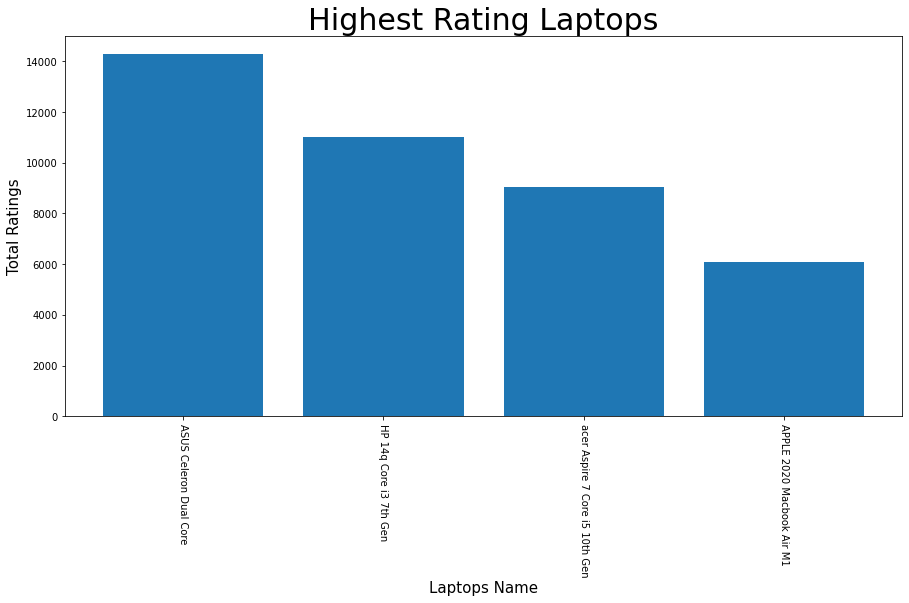

In [47]:
plt.figure(figsize=(15,7))
plt.bar(x=top5['ProductName'],height=top5['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.xticks(rotation = 270)
plt.show()

# Most Affordable Laptops ?

In [49]:
df.sort_values(by='CurrentPrice', ascending = True).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
672,Avita Cosmos 2 in 1 Celeron Dual Core,3.6,1072,189,17990,23490,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/k...
482,ASUS Chromebook Celeron Dual Core,4.1,444,68,21490,25990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
532,Avita PURA APU Dual Core A6,3.8,827,108,21490,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
597,Avita PURA APU Dual Core A6,3.8,827,108,21490,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
251,Lenovo APU Dual Core A9 A99425,3.9,197,13,21896,0,AMD APU Dual Core A9 Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...


In [50]:
top10affordable = df.sort_values(by='CurrentPrice', ascending = True).head(10)

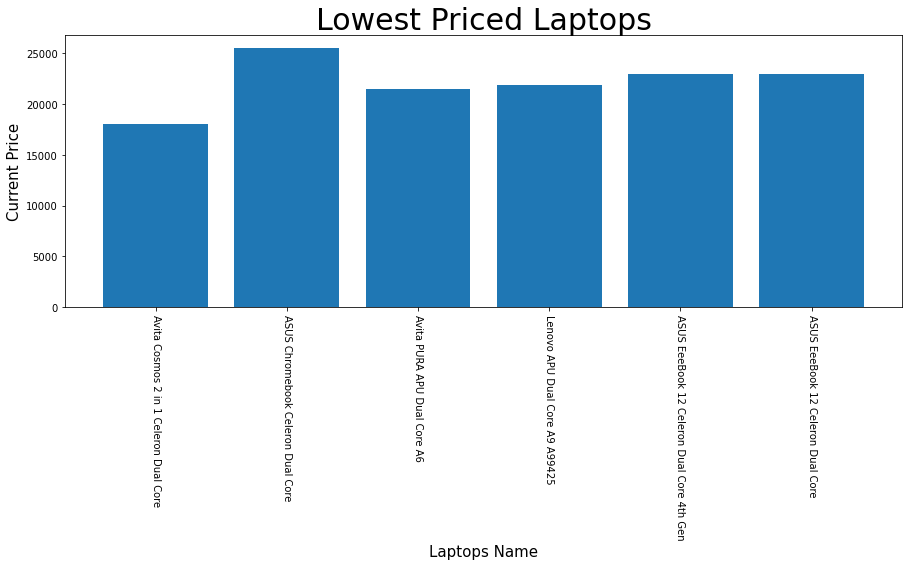

In [51]:
plt.figure(figsize=(15,5))
plt.bar(x=top10affordable['ProductName'],height=top10affordable['CurrentPrice'])
plt.title('Lowest Priced Laptops', fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation = 270)
plt.show()

In [52]:
smalldf = df[['ProductName','CurrentPrice','MRP']]
smalldf

,ProductName,CurrentPrice,MRP
0,HP Core i3 11th Gen,43990,49590
1,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,49900,68990
2,ASUS VivoBook K15 OLED (2021) Core i3 11th Gen,49990,62990
3,HP Pavilion Core i7 11th Gen,98180,118776
4,DELL Inspiron Core i3 11th Gen,46490,59712
...,...,...,...
713,ASUS Core i7 11th Gen,81990,98990
714,Lenovo Yoga Slim 7 Core i5 11th Gen,89999,92000
715,DELL Core i5 11th Gen,73900,88400
716,Lenovo IDEAPAD 3 SLIM Ryzen 5 Hexa Core AMD Ry...,59900,62200


In [53]:
df.shape

(718, 10)

In [58]:
midrange_laptops = df[(df['CurrentPrice']<45000) & (df['CurrentPrice']>35000)]

In [59]:
midrange_laptops

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
9,HP Core i3 11th Gen,4.3,367,36,44490,50196,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
16,DELL Inspiron Core i3 11th Gen,4.4,8,0,42990,56776,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
22,ASUS Core i3 11th Gen,4.3,6,0,36900,49990,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
26,DELL Vostro Core i3 11th Gen,0.0,0,0,44487,59781,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...
546,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
591,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
614,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
682,HP Core i3 11th Gen,4.5,65,9,43599,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [173]:
ram =  input()
df[df['RAM']==ram]

16 GB DDR4 RAM


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL


In [65]:
ram = input("RAM ? : ")
storage = input('Storage ? : ')
processor = input('Processor ? :')

RAM ? : 8 GB DDR4 RAM
Storage ? : 512 GB SSD
Processor ? :Intel Core i3 Processor (11th Gen)


In [66]:
df[(df.RAM == ram) & (df.Storage == storage) & (df.Processor == processor)]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook K15 OLED (2021) Core i3 11th Gen,4.6,20,2,49990,62990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,DELL Inspiron Core i3 11th Gen,4.4,23,6,46490,59712,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
9,HP Core i3 11th Gen,4.3,367,36,44490,50196,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
11,MSI Core i3 11th Gen,4.0,7,1,45990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
24,Lenovo Thinkbook Core i3 11th Gen,4.1,43,4,47990,72850,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
27,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
43,HP Core i3 11th Gen,4.3,1573,212,48900,50000,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
51,HP Core i3 11th Gen,4.5,65,9,43990,49590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
52,HP Core i3 11th Gen,4.3,1232,129,48900,50000,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
